In [169]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn import metrics
from sklearn.metrics import *
from dtreeviz.trees import *
#for graphviz install python-graphviz:
#conda install python-graphviz


In [170]:
# Incarcare dataset, prezentare coloane, primele linii din dataset

In [171]:
input_file = "drug200.csv"


# comma delimited is the default
#read_csv method - Read a comma-separated values (csv) file into DataFrame.
data = pd.read_csv(input_file, header = 0)

In [172]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [173]:
data.shape
#dimensiunea datelor

(200, 6)

In [174]:
data.columns
#coloanele

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [175]:
data.head()
#returns top n rows of a DataFrame or Series where n is a user input value

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [176]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [177]:
# Computing Info Gain

In [178]:
data['Sex']

0      F
1      M
2      M
3      F
4      F
      ..
195    F
196    M
197    M
198    M
199    F
Name: Sex, Length: 200, dtype: object

In [179]:
#Cate peroane sunt de sex feminin respectiv masculin
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [180]:
#Cum este impartit blood pressure-ul in dataset
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [181]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [182]:
# Ploturi cu distributia datelor in dataset

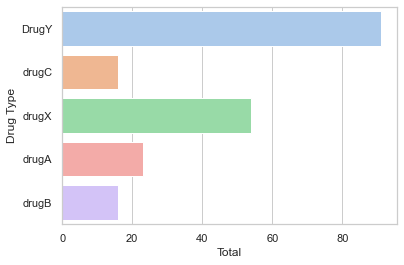

In [183]:
# Tipul de medicament folosit
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=data, palette="pastel")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

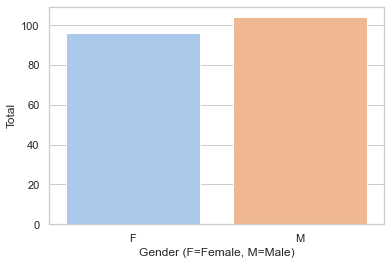

In [184]:
# Sexul distribuit in dataset
sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=data, palette="pastel")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

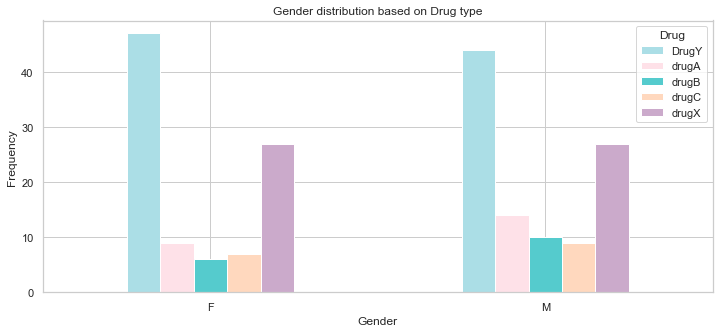

In [185]:
# Distributia sexului in functie de edicamentul administrat

pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#ABDEE6','#FEE1E8','#55CBCD','#FFD8BE','#CBAACB'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

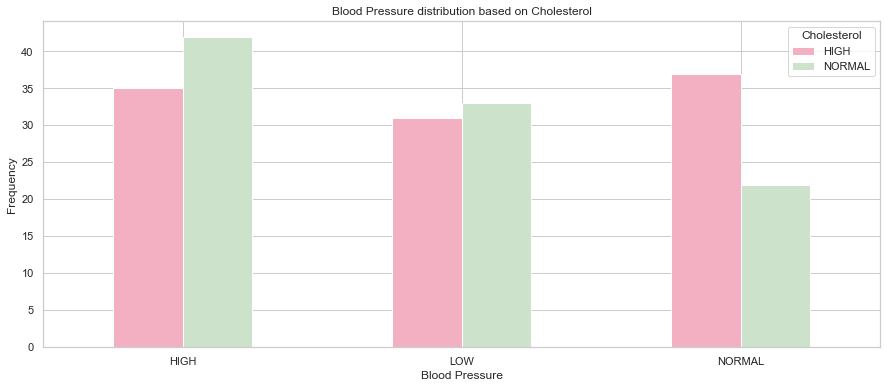

In [186]:
# Tensiunea in functie de nivelul de colesterol
pd.crosstab(data.BP,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#F3B0C3','#CCE2CB'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

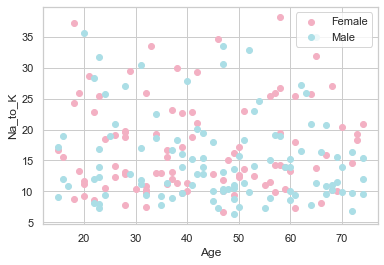

In [187]:
# Distributia sodiului si a potasiului in functie de sex 
plt.scatter(x=data.Age[data.Sex=='F'], y=data.Na_to_K[(data.Sex=='F')], c="#F3B0C3")
plt.scatter(x=data.Age[data.Sex=='M'], y=data.Na_to_K[(data.Sex=='M')], c="#ABDEE6")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [188]:
# PREPROCESARE


In [189]:
#ONE HOT ENCODER

In [190]:
df_1=pd.get_dummies(data=data,columns=["BP","Cholesterol",'Sex'],drop_first=True)

In [191]:
df_1.head()

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,0,0,1
2,47,10.114,drugC,1,0,0,1
3,28,7.798,drugX,0,1,0,0
4,61,18.043,DrugY,1,0,0,0


In [192]:
from sklearn.preprocessing import LabelEncoder
c1='Drug'
label_encoder = LabelEncoder() 
df_1[c1]= label_encoder.fit_transform(df_1[c1]) 
df_1[c1].unique()
df_1

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,0,0,1
2,47,10.114,3,1,0,0,1
3,28,7.798,4,0,1,0,0
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,0
196,16,12.006,3,1,0,0,1
197,52,9.894,4,0,1,0,1
198,23,14.020,4,0,1,1,1


In [193]:
# Split data into training and test

X = df_1.drop(['Drug','Age'],axis = 1)
Y = df_1['Drug']

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [195]:
X_train.shape

(134, 5)

In [196]:
Y_train.shape

(134,)

In [197]:
X_test.shape

(66, 5)

In [198]:
Y_test.shape

(66,)

In [199]:
#aplicare algoritm DecisionTree pe dataset cu criteriul entropy

In [200]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion="entropy")
dt

DecisionTreeClassifier(criterion='entropy')

0.925
[0 0 0]
Y_prediction: [3 4 0 0 0 4 4 4 0 4 1 0 0 0 2 3 0 0 4 0 0 4 4 4 0 0 0 0 0 4 4 3 2 4 0 0 4
 0 2 4]
Y_test: 18     3
170    4
107    0
98     0
177    0
182    4
5      4
146    4
12     0
152    4
61     1
125    0
180    0
154    0
80     2
7      3
33     0
130    0
37     4
74     0
183    0
145    4
45     4
159    4
60     0
123    0
179    0
185    0
122    0
44     4
16     4
55     3
150    1
111    4
22     0
189    0
129    4
4      0
83     1
106    4
Name: Drug, dtype: int32
Accuracy: 0.95
Recall_score is : [1.         0.33333333 1.         1.         1.        ]
Precision Score is :  [1.         1.         0.33333333 1.         1.        ]
F1 Score is :  0.8


C:\Users\Stefana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


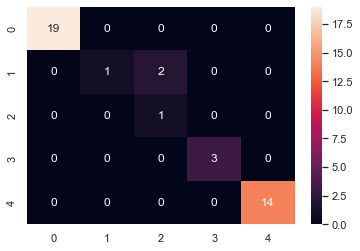

In [201]:
seed=7
num_trees = 100
bmodel = BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)
results = cross_val_score(bmodel, X, Y, cv=5)
print(results.mean())

#1. split the dataset: train and test and then fit the classifier using X_train and Y_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
bmodel.fit(X_train,Y_train)

#2. test the classifier using 3 samples - please add here your samples from above
my_tests = [[23,1,0,0,25.355],[30,1,1,1,25.355],[29,1,1,0,20.355]]
Y_prediction_test= bmodel.predict(my_tests)
print(Y_prediction_test)

#3. print the predictions and explain the results
Y_prediction = bmodel.predict(X_test)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
#4. check/test 4 metrics for classification

print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
sns.heatmap(confusion_matrix(Y_test, Y_prediction),annot=True)
recall_show = recall_score(Y_test, Y_prediction,average=None) # calculates the fraction of positive samples predicted correctly
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction, average=None) # calculates the fraction of predicted positives samples that are actually positive
print("Precision Score is : ", precision_show)
f1_show = f1_score(Y_test, Y_prediction, average='macro') # calculates the fraction of predicted positives samples that are actually positive
print("F1 Score is : ", f1_show)

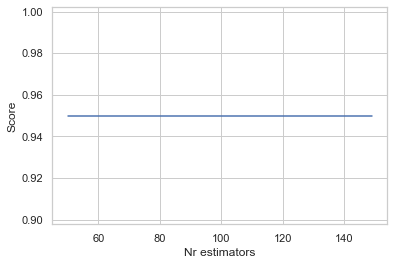

Bagging classifier with DT as base estimator max score  0.95


In [202]:
scores = []
for i in range(50,150):
    xtraClassif = BaggingClassifier(base_estimator=dt, n_estimators=i, random_state=seed)
    xtraClassif.fit(X_train, Y_train)
    scores.append(xtraClassif.score(X_test, Y_test))
    
plt.plot(range(50,150), scores)

plt.xlabel("Nr estimators")
plt.ylabel("Score")
plt.show()
maxEstimators = max(scores)
print("Bagging classifier with DT as base estimator max score ",maxEstimators)

In [203]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn

KNeighborsClassifier(n_neighbors=15)

0.925
[0 0 0]
Y_prediction: [4 1 0 0 0 4 4 4 0 4 2 0 0 0 1 3 0 0 4 0 0 4 4 1 0 0 0 0 0 1 4 4 4 4 0 0 4
 0 1 4]
Y_test: 18     3
170    4
107    0
98     0
177    0
182    4
5      4
146    4
12     0
152    4
61     1
125    0
180    0
154    0
80     2
7      3
33     0
130    0
37     4
74     0
183    0
145    4
45     4
159    4
60     0
123    0
179    0
185    0
122    0
44     4
16     4
55     3
150    1
111    4
22     0
189    0
129    4
4      0
83     1
106    4
Name: Drug, dtype: int32
Accuracy: 0.8


C:\Users\Stefana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Recall_score is : [1.         0.33333333 0.         0.33333333 0.78571429]
Precision Score is :  [1.         0.2        0.         1.         0.78571429]
F1 Score is :  0.5071428571428571


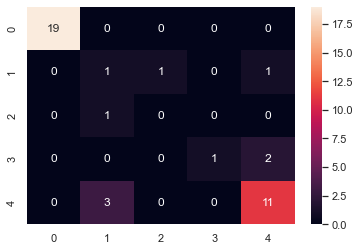

In [204]:
seed=7
num_trees = 100
bmodel2 = BaggingClassifier(base_estimator=knn, n_estimators=num_trees, random_state=seed)
results = cross_val_score(bmodel, X, Y, cv=5)
print(results.mean())

#1. split the dataset: train and test and then fit the classifier using X_train and Y_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
bmodel2.fit(X_train,Y_train)

#2. test the classifier using 3 samples - please add here your samples from above
my_tests = [[23,1,0,0,25.355],[30,1,1,1,25.355],[29,1,1,0,20.355]]
Y_prediction_test= bmodel2.predict(my_tests)
print(Y_prediction_test)

#3. print the predictions and explain the results
Y_prediction = bmodel2.predict(X_test)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
#4. check/test 4 metrics for classification

print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
sns.heatmap(confusion_matrix(Y_test, Y_prediction),annot=True)
recall_show = recall_score(Y_test, Y_prediction,average=None) # calculates the fraction of positive samples predicted correctly
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction, average=None) # calculates the fraction of predicted positives samples that are actually positive
print("Precision Score is : ", precision_show)
f1_show = f1_score(Y_test, Y_prediction, average='macro') # calculates the fraction of predicted positives samples that are actually positive
print("F1 Score is : ", f1_show)

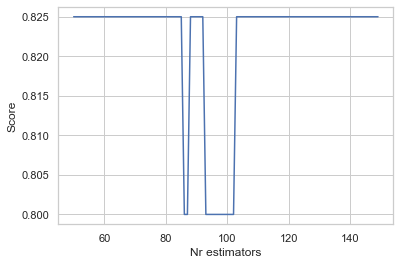

Bagging classifier with knn as base estimator max score  0.825


In [205]:
scores = []
for i in range(50,150):
    xtraClassif = BaggingClassifier(base_estimator=knn, n_estimators=i, random_state=seed)
    xtraClassif.fit(X_train, Y_train)
    scores.append(xtraClassif.score(X_test, Y_test))
    
plt.plot(range(50,150), scores)

plt.xlabel("Nr estimators")
plt.ylabel("Score")
plt.show()
maxEstimators = max(scores)
print("Bagging classifier with knn as base estimator max score ",maxEstimators)

In [206]:
# TO DO :RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
randForrest=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
randForrest.fit(X_train,Y_train)

Y_prediction=randForrest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)
recall_show = recall_score(Y_test, Y_prediction,average=None) # calculates the fraction of positive samples predicted correctly
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction, average=None) # calculates the fraction of predicted positives samples that are actually positive
print("Precision Score is : ", precision_show)

Accuracy: 0.975
Confusion matrix is :  [[19  0  0  0  0]
 [ 0  2  1  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Recall_score is : [1.         0.66666667 1.         1.         1.        ]
Precision Score is :  [1.  1.  0.5 1.  1. ]


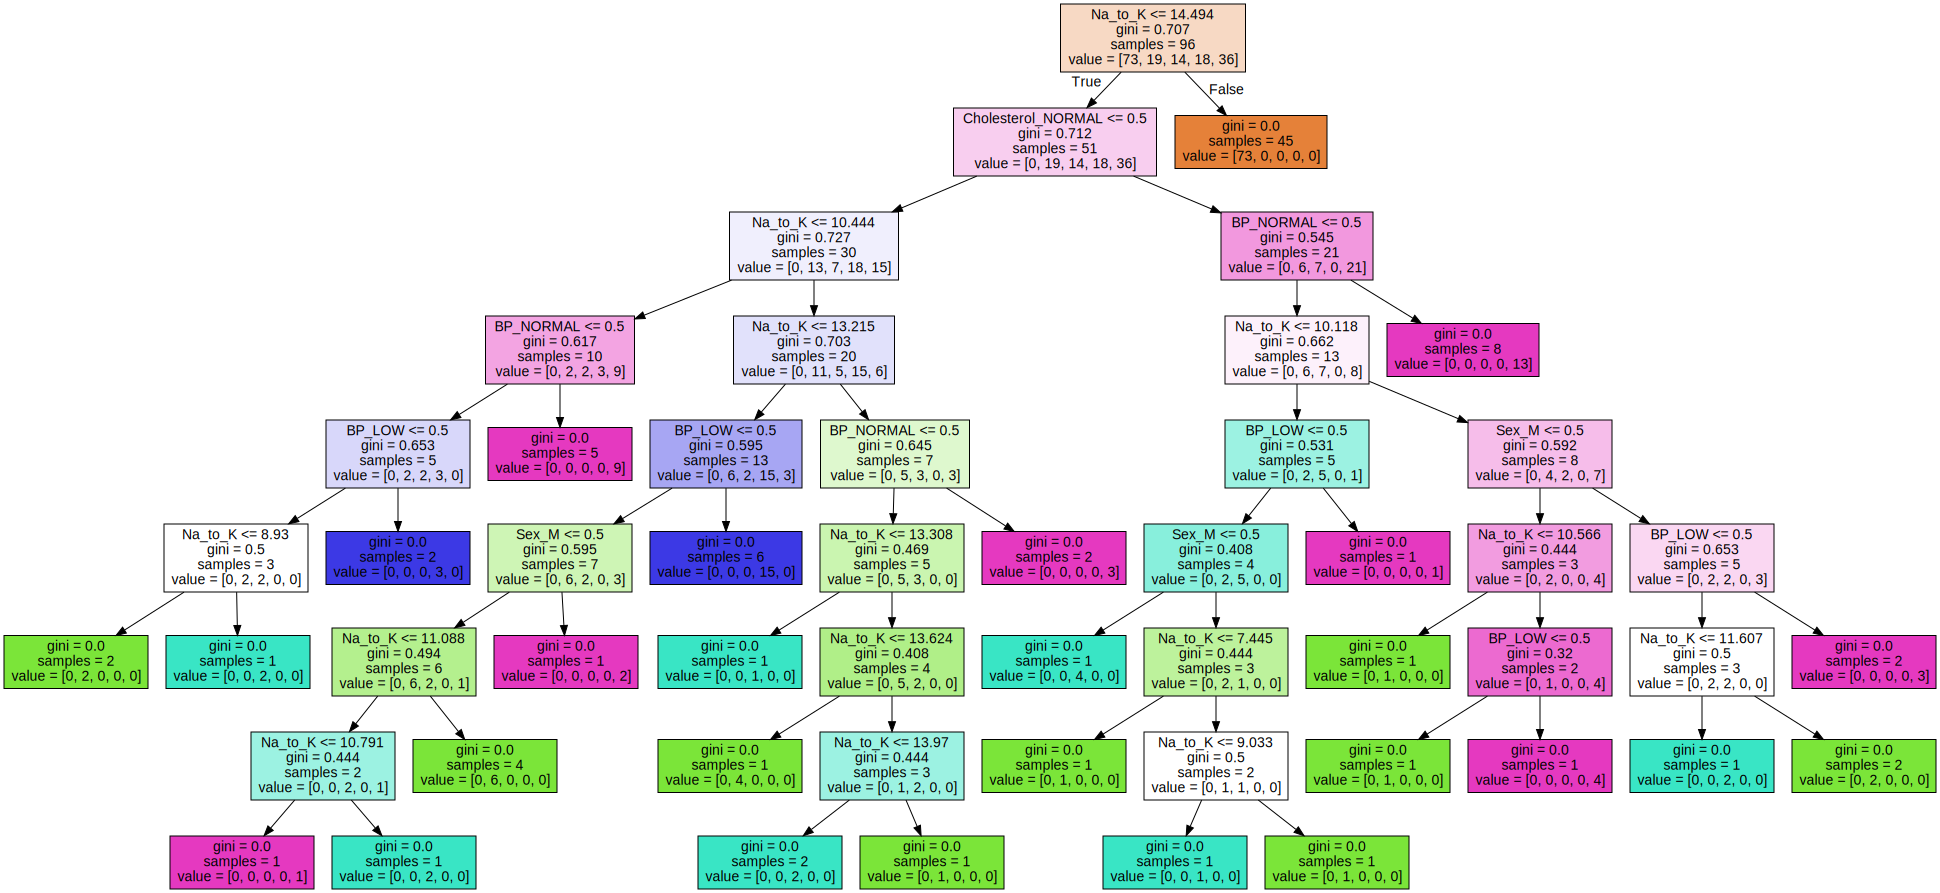

In [207]:
dot_data = tree.export_graphviz(randForrest.estimators_[0], out_file = None, feature_names=X.columns, filled=True)
graph1 = graphviz.Source(dot_data)
graph1

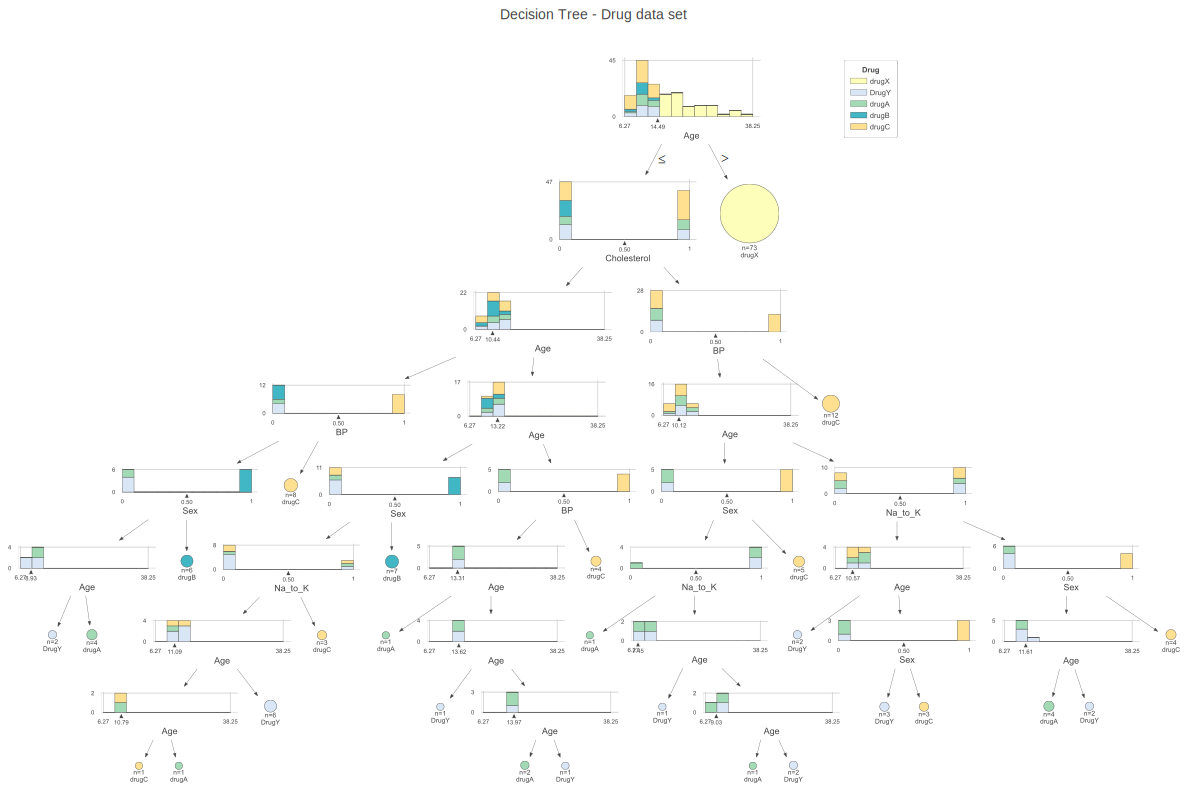

In [208]:
viz2 = dtreeviz(randForrest.estimators_[0],
               x_data=X_train,
               y_data=Y_train,
               target_name='Drug',
               feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"], 
               class_names=["drugX","DrugY","drugA","drugB","drugC"],
               title="Decision Tree - Drug data set")
viz2

In [209]:
# TO DO: ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
extraTrees=ExtraTreesClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
extraTrees.fit(X_train,Y_train)

Y_prediction=extraTrees.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)
recall_show = recall_score(Y_test, Y_prediction,average=None) # calculates the fraction of positive samples predicted correctly
print("Recall_score is :",recall_show)
precision_show = precision_score(Y_test, Y_prediction, average=None) # calculates the fraction of predicted positives samples that are actually positive
print("Precision Score is : ", precision_show)



Accuracy: 0.95
Confusion matrix is :  [[19  0  0  0  0]
 [ 0  2  1  0  0]
 [ 0  0  1  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0 14]]
Recall_score is : [1.         0.66666667 1.         0.66666667 1.        ]
Precision Score is :  [0.95 1.   0.5  1.   1.  ]


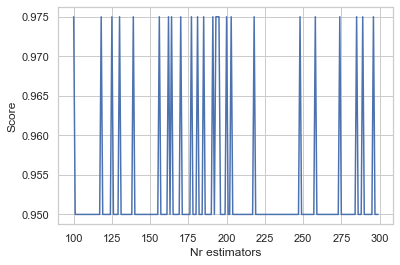

ExtraTreesClassifier max score  0.975


In [210]:
scores = []
for i in range(100,300):
    xtraClassif = ExtraTreesClassifier(n_estimators=  i)
    xtraClassif.fit(X_train, Y_train)
    scores.append(xtraClassif.score(X_test, Y_test))
    
plt.plot(range(100,300), scores)

plt.xlabel("Nr estimators")
plt.ylabel("Score")
plt.show()
maxEstimators = max(scores)
print("ExtraTreesClassifier max score ",maxEstimators)

In [211]:
viz3 = dtreeviz(extraTrees.estimators_[0],
               x_data=X_train,
               y_data=Y_train,
               target_name='Drug',
               feature_names=["Age","Sex","BP","Cholesterol","Na_to_K"], 
               class_names=["drugX","DrugY","drugA","drugB","drugC"],
               title="Decision Tree - Drug data set")
viz3